# 나이브 베이즈 분류기

#### 가장 도움 된 블로그 : https://blog.naver.com/eded0902/222453438009 (사진 출처)

-> 베이즈 정리에 기반한 통계적 분류 기법(대표적으로 스팸 분류)

-> 사전확률과 사후확률의 관계를 조건부 확률을 이용하여 계산

### 특징
* 간단하고 빠르며 정확
* 대용량 데이터셋에 적합
* 연속형보다 이산형에 성능 좋음
* multiple class 예측에도 사용
* feature끼리 서로 독립이라는 조건이 필요 -> 개별 특성 확률 곱하기 가능
* 각 클래스에 대한 가능도 비교를 통한 분류
* 새로운 정보를 토대로 어떤 사건이 발생했다는 주장에 대한 신뢰도
* 파라미터 추정은 최대우도추정법 이용

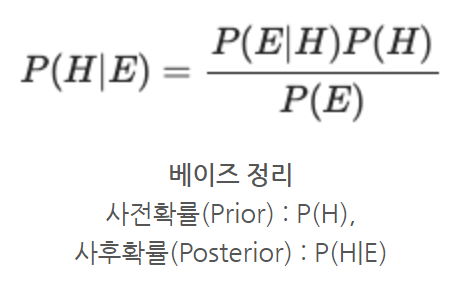

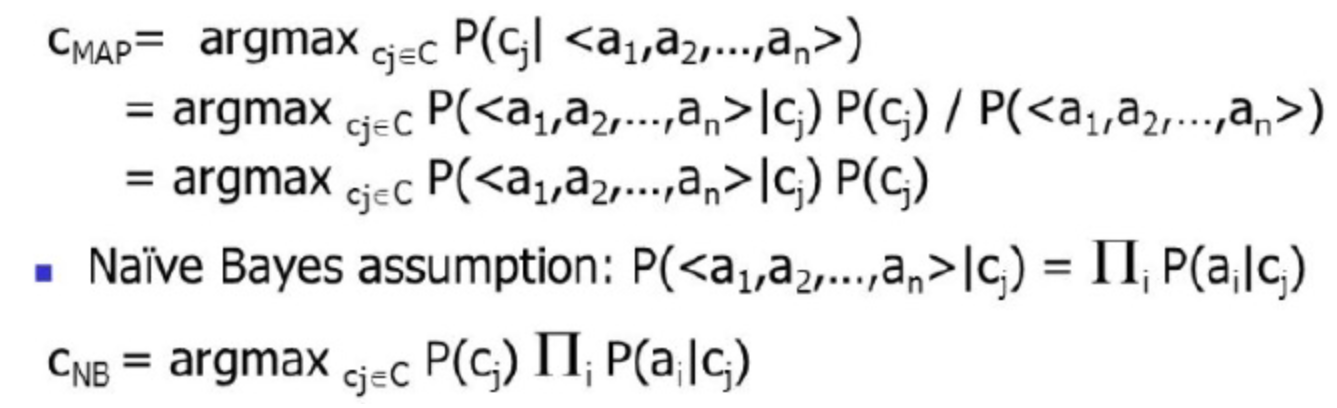

-> 사전확률과 개별 특성들이 나타날 확률을 전부 곱해준 값이 큰 결과가 발생 확률이 높음

# 실습: Mushroom Classification

### 데이터 설명(출처: kaggle)
* cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

* cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* bruises: bruises=t,no=f

* odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* gill-attachment: attached=a,descending=d,free=f,notched=n

* gill-spacing: close=c,crowded=w,distant=d

* gill-size: broad=b,narrow=n

* gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

* stalk-shape: enlarging=e,tapering=t

* stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

* stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

* stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

* veil-type: partial=p,universal=u

* veil-color: brown=n,orange=o,white=w,yellow=y

* ring-number: none=n,one=o,two=t

* ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

* spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

* population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

* habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d


##### * class: p 독버섯, e일반

In [1]:
# 패키지 설치
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, precision_score, recall_score, auc
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, accuracy_score, f1_score

## 데이터 불러오기

In [2]:
# 데이터 불러오기
mush= pd.read_csv('C:/Users/82102/Desktop/mushrooms.csv')
mush

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
# 데이터 정보 확인
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
# 결측값 확인
mush.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

* 결측값 없음

## EDA 및 시각화

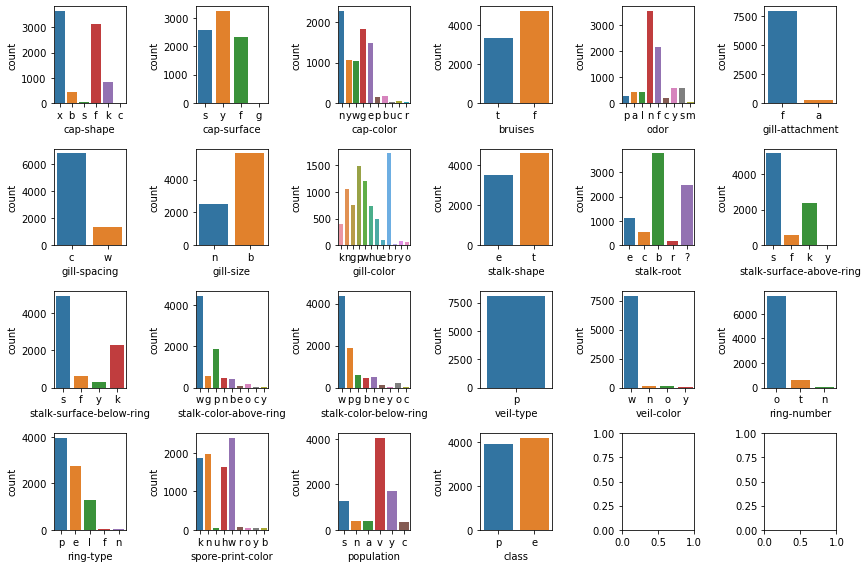

In [5]:
fig,axes = plt.subplots(nrows=4,ncols=6,figsize=(12,8))
sns.countplot(x="cap-shape",data= mush,ax=axes[0,0])
sns.countplot(x="cap-surface", data= mush, ax=axes[0,1])
sns.countplot(x="cap-color",data=mush,ax=axes[0,2])
sns.countplot(x="bruises",data=mush,ax=axes[0,3])
sns.countplot(x="odor",data=mush,ax=axes[0,4])
sns.countplot(x="gill-attachment",data=mush,ax=axes[0,5])
sns.countplot(x="gill-spacing",data=mush,ax=axes[1,0])
sns.countplot(x="gill-size",data=mush,ax=axes[1,1])
sns.countplot(x="gill-color",data=mush,ax=axes[1,2])
sns.countplot(x="stalk-shape",data=mush,ax=axes[1,3])
sns.countplot(x="stalk-root",data=mush,ax=axes[1,4])
sns.countplot(x="stalk-surface-above-ring",data=mush,ax=axes[1,5])
sns.countplot(x="stalk-surface-below-ring",data= mush,ax=axes[2,0])
sns.countplot(x="stalk-color-above-ring", data= mush, ax=axes[2,1])
sns.countplot(x="stalk-color-below-ring",data=mush,ax=axes[2,2])
sns.countplot(x="veil-type",data=mush,ax=axes[2,3])
sns.countplot(x="veil-color",data= mush,ax=axes[2,4])
sns.countplot(x="ring-number", data= mush, ax=axes[2,5])
sns.countplot(x="ring-type",data=mush,ax=axes[3,0])
sns.countplot(x="spore-print-color",data=mush,ax=axes[3,1])
sns.countplot(x="population",data=mush,ax=axes[3,2])
sns.countplot(x="habitat",data=mush,ax=axes[3,3])
sns.countplot(x="class",data=mush,ax=axes[3,3])
plt.tight_layout()

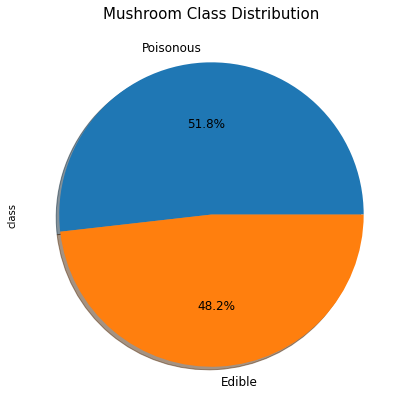

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
labels = (('Poisonous','Edible'))
mush['class'].value_counts().plot.pie(labels= labels, shadow= True, ax= ax, autopct='%1.1f%%',textprops={'fontsize': 12} )

ax.set_title('Mushroom Class Distribution', fontsize = 15);

* target 데이터 균일

# 전처리

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

In [8]:
# 라밸인코딩 - 수치형으로 전체 바꿔줌
le = preprocessing.LabelEncoder()

In [9]:
mush_le= mush.apply(func=le.fit_transform)
mush_le

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [10]:
# 원핫인코딩 - 순서 없애줌
mush_enc= pd.get_dummies(mush_le,columns=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat'])
mush_enc

,class,cap-shape_0,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_0,cap-surface_1,cap-surface_2,...,population_3,population_4,population_5,habitat_0,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,1,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


# 모델링

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [12]:
# 타깃데이터 설정: class
target = mush_enc['class']
data = mush_enc.drop(['class'],axis = 1, inplace=False)

In [13]:
# 데이터 세트 분리
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size= 0.3, random_state=156)

In [14]:
nb = GaussianNB()

In [15]:
y_pred = nb.fit(X_train, y_train).predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 1, 1])

In [16]:
confusion_matrix(y_test, y_pred)

array([[1137,  101],
       [   1, 1199]], dtype=int64)

* 0(독버섯x): 101개 오분류
* 1(독버섯): 1개 오분류

In [17]:
print("총 %d개 중 틀린 개수 : %d" % (X_test.shape[0], (y_test != y_pred).sum()))

총 2438개 중 틀린 개수 : 102


In [18]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, y_pred)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, y_pred)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, y_pred)))

accuracy:0.9582
precision: 0.9223
recall: 0.9992


In [19]:
# 교차검증
score_list = cross_val_score(nb,data,target, cv=10)
score = np.mean(score_list)
print(score)

0.9147033428462363


In [20]:
print(score_list)

[0.68388684 0.96309963 0.98154982 0.9803198  0.97167488 0.96428571
 0.89408867 0.86453202 0.93596059 0.90763547]


### 가중치 줘서 정확도 높히기

In [21]:
# 독버섯이 아닐 확률에 가중치
nb2 = GaussianNB(priors = [99999999999999999/100000000000000000, 1/100000000000000000])
y_pred2 = nb2.fit(X_train, y_train).predict(X_test)
confusion_matrix(y_test,y_pred2)

array([[1227,   11],
       [   1, 1199]], dtype=int64)

* 독버섯이 아닐때 분류를 너무 못해서 독버섯일 때 분류 정확도가 내려가기 전까지 독버섯이 아닐 확률에 가중치를 줌
* (근데 이래도 되는거 맞나...?)

* 0(독버섯x): 11개 오분류
* 1(독버섯): 1개 오분류

In [22]:
#정확도
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, y_pred2)))
# 정밀도
print('precision: {:0.4f}'.format(precision_score(y_test, y_pred2)))
#재현율
print('recall: {:0.4f}'.format(recall_score(y_test, y_pred2)))

accuracy:0.9951
precision: 0.9909
recall: 0.9992


* 성능 좋아짐

In [23]:
# 교차검증
score_list = cross_val_score(nb2, data,target, cv=10)
score = np.mean(score_list)
print(score)

0.9558295312017158


In [24]:
print(score_list)

[0.68511685 0.98400984 0.99630996 0.99876999 0.99630542 0.99753695
 1.         1.         0.93965517 0.96059113]
